In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Name: Sidharth Kodaikkal Vijayan
# Email: skodaikk@eng.ucsd.edu
# PID: A53101352

# from pyspark import SparkContext
# sc = SparkContext()


In [3]:
%pylab inline
data_dir = "./Data/Weather/"
# data_dir = "../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


In [19]:
import pickle
Data=pickle.load(open('../Data/Weather/SampleStations.pickle','r'))
STAT,STAT_description=pickle.load(open('../Data/Weather/STAT.pickle','r'))

In [20]:
FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)

In [21]:
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
# for m in ['TMIN']:
    t_df=df[df['measurement']==m]
#     print(type(t_df))
#     print(type(df))
    m_df[m]=t_df

### Script for plotting yearly plots 

In [2]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

### Plot the Number of measurements recorded each day for TMAX

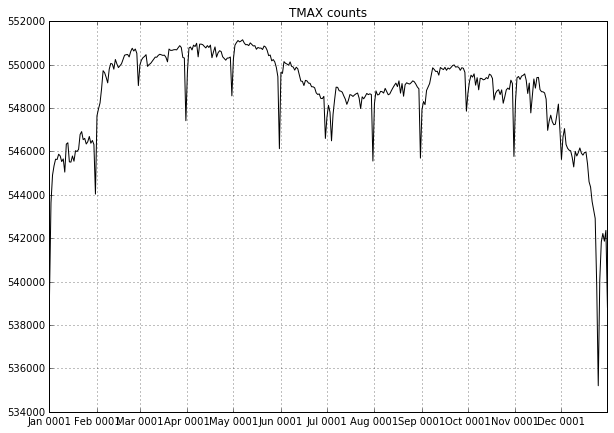

In [22]:
## Your code here

YearlyPlots(STAT['TMAX']['NE'],c='black',ttl='TMAX counts')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


In [ ]:
# Couldnt get markdown working

# The reason for these lower counts is because there might be 
# maintainance work going on during the end of the month and 
# during the start and end of the year.


In [56]:
import pickle
tm_a_s =pickle.load(open('../Data/Weather/tmax_all_stations.pickle','r'))
tm_a_y = pickle.load(open('../Data/Weather/tmax_all_years.pickle','r'))

# STAT,STAT_description=pickle.load(open('../Data/Weather/STAT.pickle','r'))

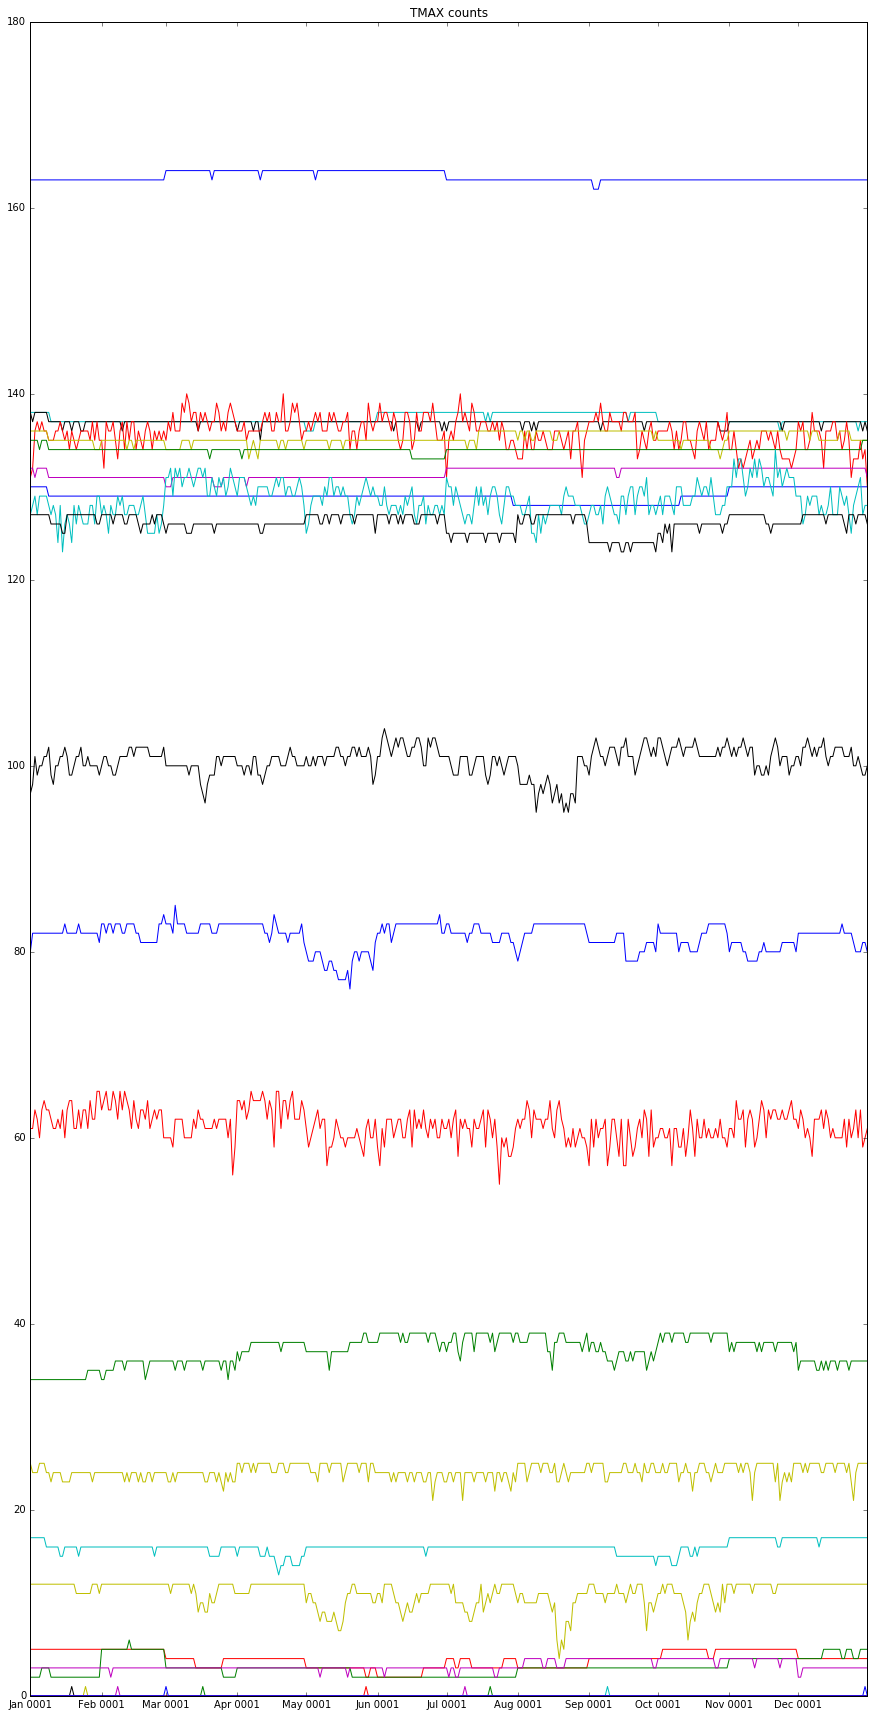

In [85]:
# print(Data[0:3])
# from collections import Counter

# print(len(Data[0][1]))

# type(Data)
# print len(Data)

tr = [d[0] for d in tm_a_s]

# vals = array([d[1] for d in tm_a_s])

# s_val = vals.argsort()

r_int = random_integers(0,shape(tr)[0],10)

tr = [d[0] for d in tm_a_s]

vals = array([d[1] for d in tm_a_s]).astype(int)

s_val = sum(vals,axis=1 ).argsort()

# print(Counter(tr))

# print len(Data[0][1])

figure(figsize=(15,30));
for i in range(10):
# figure(figsize=(15,30))
#     plt.figure()
#     figure()
#     subplot()
#     subplot(5,2,i+1)
    YearlyPlots(tm_a_s[s_val[-(i+1)]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_s[s_val[i]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_s[r_int[i]][1],ttl='TMAX counts')



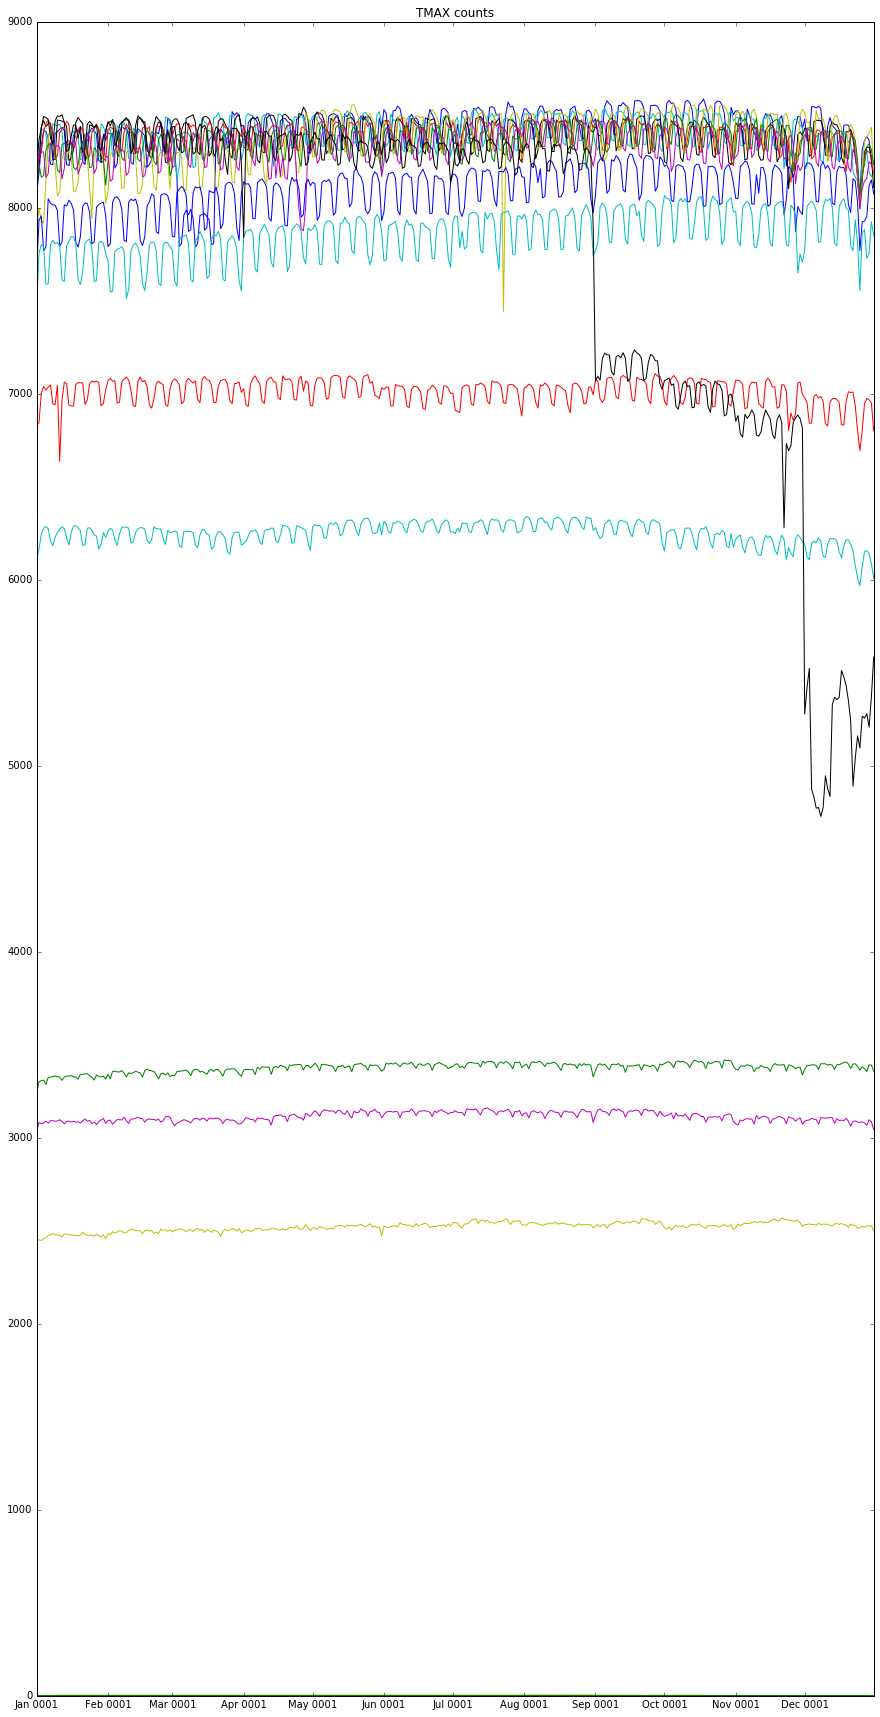

In [89]:
tr = [d[0] for d in tm_a_y]

r_int = random_integers(0,shape(tr)[0],10)

tr = [d[0] for d in tm_a_y]

vals = array([d[1] for d in tm_a_y]).astype(int)

s_val = sum(vals,axis=1 ).argsort()

# print(Counter(tr))

# print len(Data[0][1])

figure(figsize=(15,30));
for i in range(10):
# figure(figsize=(15,30))
#     plt.figure()
#     figure()
#     subplot()
#     subplot(5,2,i+1)
    YearlyPlots(tm_a_y[s_val[-(i+1)]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_y[s_val[i]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_y[r_int[i]][1],ttl='TMAX counts')



In [ ]:
# From figure 1, It can be seen that many of these stations 
# don't show this effect.
# I have plotted 10 stations each with max 
# count of readings and min count of reading along with
# random 10 stations. The station on top(in blue) and 
# just below it(in black) doesn't vary
# much throughout the year.
# 
# One less practical solution would be not doing the 
# maintainance work at all (not shutting down the systems)
# Other practical solution would be doing the maintanance 
# work on random dates, not specifically at the start or 
# end of the month/year.
# 
# Another observation from graph 2 is that the total count 
# aggregated by year shows this affect much more.
# Combining this with the first figure, it can be 
# speculated that some of these stations have this problem.
# This effect can be also removed by not taking into account
# these stations.


In [90]:
import pickle
tm_a_s =pickle.load(open('../Data/Weather/snwd_all_stations.pickle','r'))
tm_a_y = pickle.load(open('../Data/Weather/snwd_all_years.pickle','r'))

# STAT,STAT_description=pickle.load(open('../Data/Weather/STAT.pickle','r'))

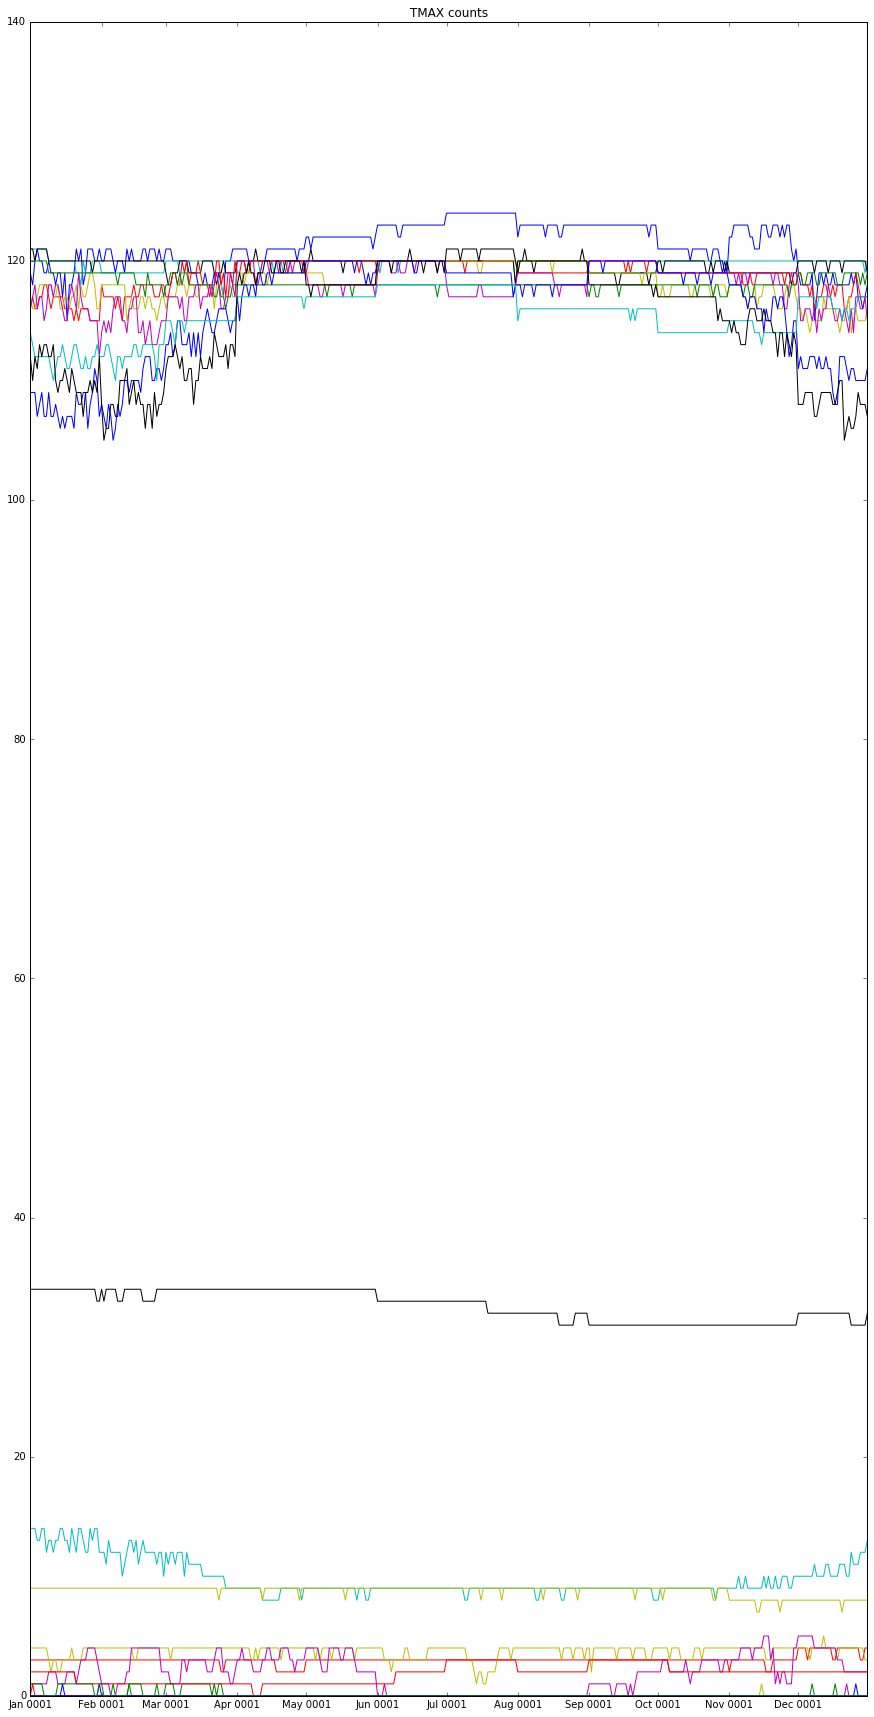

In [92]:
# print(Data[0:3])
# from collections import Counter

# print(len(Data[0][1]))

# type(Data)
# print len(Data)

tr = [d[0] for d in tm_a_s]

# vals = array([d[1] for d in tm_a_s])

# s_val = vals.argsort()

r_int = random_integers(0,shape(tr)[0],10)

tr = [d[0] for d in tm_a_s]

vals = array([d[1] for d in tm_a_s]).astype(int)

s_val = sum(vals,axis=1 ).argsort()

# print(Counter(tr))

# print len(Data[0][1])

figure(figsize=(15,30));
for i in range(10):
# figure(figsize=(15,30))
#     plt.figure()
#     figure()
#     subplot()
#     subplot(5,2,i+1)
    YearlyPlots(tm_a_s[s_val[-(i+1)]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_s[s_val[i]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_s[r_int[i]][1],ttl='TMAX counts')



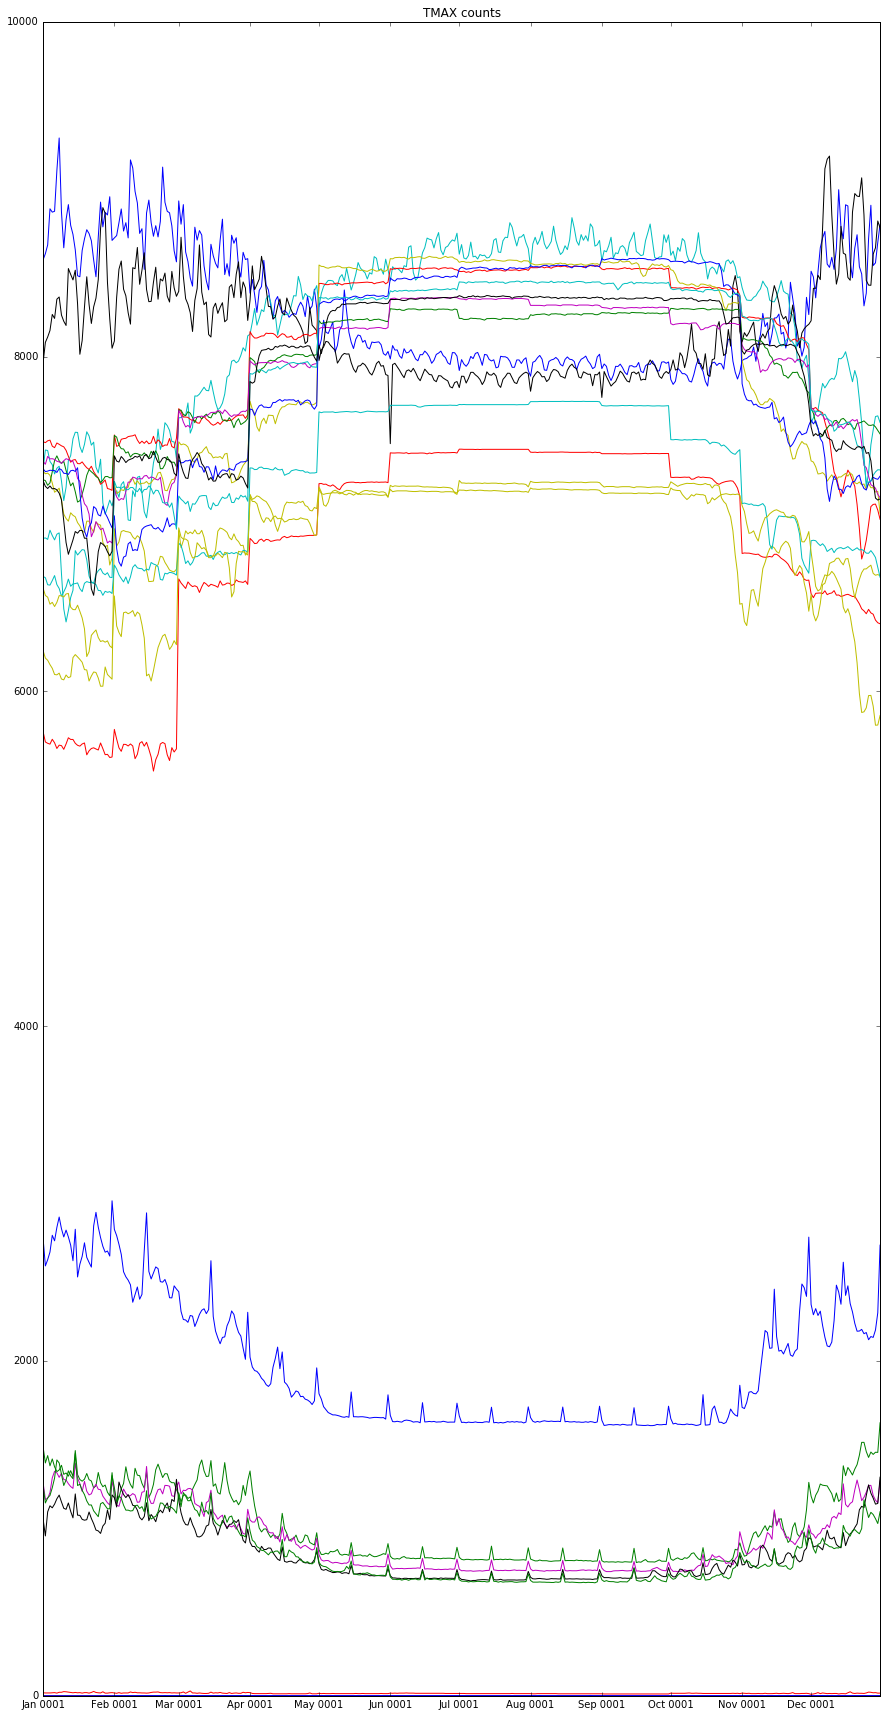

In [93]:
tr = [d[0] for d in tm_a_y]

r_int = random_integers(0,shape(tr)[0],10)

tr = [d[0] for d in tm_a_y]

vals = array([d[1] for d in tm_a_y]).astype(int)

s_val = sum(vals,axis=1 ).argsort()

# print(Counter(tr))

# print len(Data[0][1])

figure(figsize=(15,30));
for i in range(10):
# figure(figsize=(15,30))
#     plt.figure()
#     figure()
#     subplot()
#     subplot(5,2,i+1)
    YearlyPlots(tm_a_y[s_val[-(i+1)]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_y[s_val[i]][1],ttl='TMAX counts')
    YearlyPlots(tm_a_y[r_int[i]][1],ttl='TMAX counts')



In [95]:
# It can be seen that the graphs are not varying much for
# a given station. But, it is varying a lot when aggregated
# by year.
# 
# The counts are generally higer in the middle of the year.
# This could be because it is summer during that time
# and a lot of reading have to be taken to try to get 
# a non-zero value for the snow depth. (Lot of values
# for snow depth were recorded as 0)